<h1> <center> Second Lab <h1>

<h4>1- OF course, always the exhaustive search takes SO MUCH more time and iterations<h4>
</nh4>2- From the iteration perspective, Golden section search is not necessarily better than Dichotomy search, it depends on the function shape and derivative.<h4>
</nh4>3- Using the optimized method of Golden section search (i.e. by resuing points from the previous iteration), would drastically decrease the complexity by minimizing the number of need function evaluations.

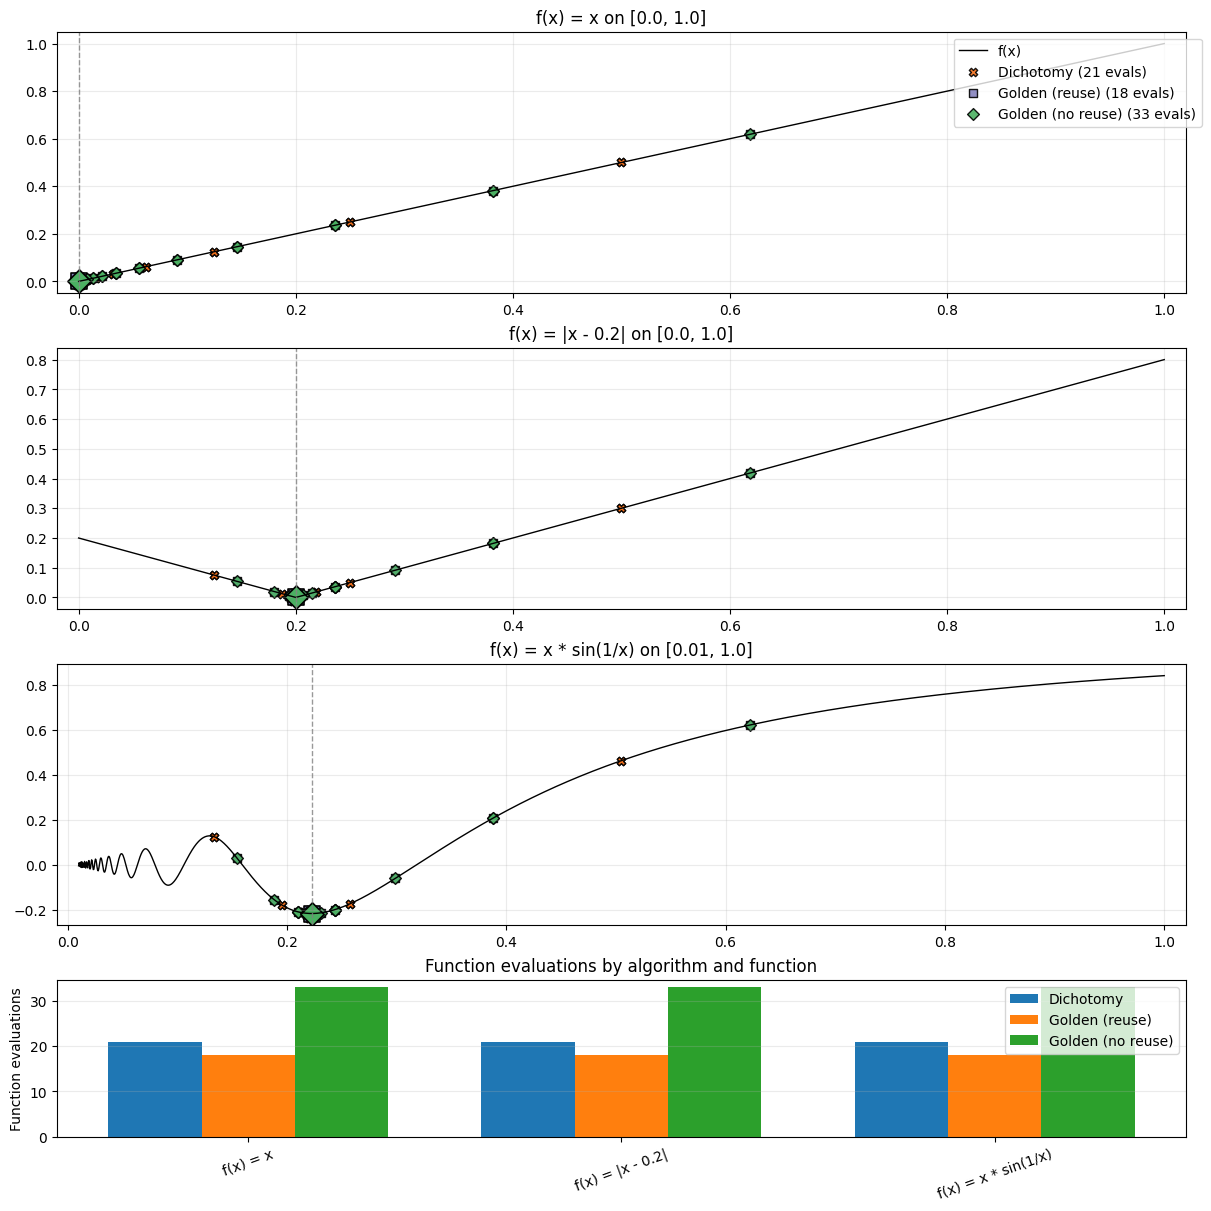

Function-evaluations table (rows = functions):
Function                                         Dichotomy        Golden (reuse)     Golden (no reuse)
f(x) = x                                                21                    18                    33
f(x) = |x - 0.2|                                        21                    18                    33
f(x) = x * sin(1/x)                                     21                    18                    33

Iterations table (rows = functions):
Function                                         Dichotomy        Golden (reuse)     Golden (no reuse)
f(x) = x                                                10                    15                    15
f(x) = |x - 0.2|                                        10                    15                    15
f(x) = x * sin(1/x)                                     10                    15                    15


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def exhaustive_search(f, a, b, eps):
    x_vals = np.arange(a, b + eps, eps)
    tested_x = []
    f_evals = 0
    min_x = x_vals[0]
    min_val = f(min_x)
    tested_x.append(min_x);
    f_evals += 1
    for x in x_vals[1:]:
        val = f(x);
        tested_x.append(x);
        f_evals += 1
        if val < min_val:
            min_val = val;
            min_x = x
    iterations = f_evals
    return min_x, min_val, iterations, f_evals, np.array(tested_x)

def dichotomy(f, a, b, eps, delta=1e-5):
    iterations = 0;
    f_evals = 0;
    tested_x = []
    while (b - a) > eps:
        mid = (a + b) / 2
        x1 = mid - delta;
        x2 = mid + delta
        f1 = f(x1);
        f2 = f(x2)
        tested_x.extend([x1, x2]);
        f_evals += 2;
        iterations += 1
        if f1 < f2:
            b = x2
        else:
            a = x1
    x_min = (a + b) / 2
    f_min = f(x_min);
    tested_x.append(x_min);
    f_evals += 1
    return x_min, f_min, iterations, f_evals, np.array(tested_x)

def golden_section(f, a, b, eps):
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    iterations = 0;
    f_evals = 0;
    tested_x = []
    x1 = a + resphi * (b - a);
    x2 = b - resphi * (b - a)
    f1 = f(x1);
    f2 = f(x2);
    tested_x.extend([x1, x2]);
    f_evals += 2
    while abs(b - a) > eps:
        iterations += 1
        if f1 < f2:
            b = x2
            x2 = x1;
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = f(x1);
            tested_x.append(x1)
        else:
            a = x1
            x1 = x2;
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = f(x2);
            tested_x.append(x2)
        f_evals += 1
    x_min = (a + b) / 2;
    f_min = f(x_min);
    tested_x.append(x_min);
    f_evals += 1
    return x_min, f_min, iterations, f_evals, np.array(tested_x)

def golden_no_reuse(f, a, b, eps):
    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi
    iterations = 0;
    f_evals = 0;
    tested_x = []
    x1 = a + resphi * (b - a);
    x2 = b - resphi * (b - a)
    f1 = f(x1);
    f2 = f(x2);
    tested_x.extend([x1, x2]);
    f_evals += 2
    while abs(b - a) > eps:
        iterations += 1
        if f1 < f2:
            b = x2
        else:
            a = x1
        x1 = a + resphi * (b - a);
        x2 = b - resphi * (b - a)
        f1 = f(x1);
        f2 = f(x2);
        tested_x.extend([x1, x2]);
        f_evals += 2
    x_min = (a + b) / 2;
    f_min = f(x_min);
    tested_x.append(x_min);
    f_evals += 1
    return x_min, f_min, iterations, f_evals, np.array(tested_x)

f1 = lambda x: x
f2 = lambda x: np.abs(x - 0.2)
f3 = lambda x: x * np.sin(1 / x)
functions = [
    ("f(x) = x", f1, 0.0, 1.0),
    ("f(x) = |x - 0.2|", f2, 0.0, 1.0),
    ("f(x) = x * sin(1/x)", f3, 0.01, 1.0)
]

eps = 1e-3

algos = [
    ("Dichotomy", dichotomy, mpl.cm.Oranges, "X"),
    ("Golden (reuse)", golden_section, mpl.cm.Purples, "s"),
    ("Golden (no reuse)", golden_no_reuse, mpl.cm.Greens, "D"),
]

results = {fname: {"fevals": [], "iters": []} for fname, _, _, _ in functions}
per_func_algo_tested = {}

n_funcs = len(functions)
fig = plt.figure(constrained_layout=True, figsize=(12, 3 * n_funcs + 3))
gs = fig.add_gridspec(n_funcs + 1, 1, height_ratios=[1] * n_funcs + [0.6])

for i, (fname, f, a, b) in enumerate(functions):
    ax = fig.add_subplot(gs[i, 0])
    xs = np.linspace(a, b, 2000)
    ax.plot(xs, f(xs), color="black", lw=1, label="f(x)")

    per_func_algo_tested[fname] = {}

    for alg_name, alg_func, cmap, marker in algos:
        x_min, f_min, iters, fevals, tested = alg_func(f, a, b, eps)
        results[fname]["fevals"].append(fevals)
        results[fname]["iters"].append(iters)
        per_func_algo_tested[fname][alg_name] = tested
        color = cmap(0.6)
        ax.scatter(tested, f(tested), s=36, facecolors=color, edgecolors="k", marker=marker, alpha=0.9,
                   label=f"{alg_name} ({fevals} evals)")
        ax.scatter([x_min], [f_min], facecolors=color, edgecolors='k', s=140, marker=marker, linewidth=1.2)

    xs_ref = np.linspace(a, b, 20001)
    ref_x = xs_ref[np.nanargmin(f(xs_ref))]
    ax.axvline(ref_x, color='gray', linestyle='--', linewidth=1.0, alpha=0.8)

    ax.set_title(fname + f" on [{a}, {b}]")
    ax.set_xlim(a - 0.02 * (b - a), b + 0.02 * (b - a))
    ax.grid(alpha=0.25)
    if i == 0:
        ax.legend(loc='upper right', bbox_to_anchor=(1.02, 1.0))

ax_summary = fig.add_subplot(gs[n_funcs, 0])
x = np.arange(n_funcs)
width = 0.25
for j, (alg_name, _, _, _) in enumerate(algos):
    fevals = [results[fname]["fevals"][j] for fname, _, _, _ in functions]
    ax_summary.bar(x + (j - (len(algos) - 1) / 2) * width, fevals, width=width, label=alg_name)
ax_summary.set_xticks(x)
ax_summary.set_xticklabels([fname for fname, _, _, _ in functions], rotation=20)
ax_summary.set_ylabel("Function evaluations")
ax_summary.set_title("Function evaluations by algorithm and function")
ax_summary.legend()
ax_summary.grid(axis='y', alpha=0.25)

plt.show()

algos_simple = [(name, None) for name, _, _, _ in algos]
print("Function-evaluations table (rows = functions):")
header = "Function".ljust(36)
for alg_name, _ in algos_simple:
    header += f"{alg_name:>22}"
print(header)
for idx, fname in enumerate([fname for fname, _, _, _ in functions]):
    row = fname.ljust(36)
    for j, (alg_name, _, _, _) in enumerate(algos):
        row += f"{results[fname]['fevals'][j]:22d}"
    print(row)

print("\nIterations table (rows = functions):")
header = "Function".ljust(36)
for alg_name, _ in algos_simple:
    header += f"{alg_name:>22}"
print(header)
for idx, fname in enumerate([fname for fname, _, _, _ in functions]):
    row = fname.ljust(36)
    for j, (alg_name, _, _, _) in enumerate(algos):
        row += f"{results[fname]['iters'][j]:22d}"
    print(row)


<h1> <center> The Second Part "Minimization" <h1>

In [63]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
alpha = np.random.rand()
beta = np.random.rand()

k = np.arange(101)
x = k /100
delta = np.random.normal(0, 1, size=len(x))
y = alpha * x + beta + delta

<h2> <center> Defining the modules <h2>

In [64]:
# Linear: F(x, a, b) = a*x + b
def linear_model(x, a, b):
    return a * x + b

# Rational: F(x, a, b) = a / (1 + b*x)
def rational_model(x, a, b):
    return a / (1 + b * x)

<h4> Defining the error function <h4>

In [76]:
def least_squares(model, x, y, a, b):
    return np.sum((model(x, a, b) - y) ** 2)

In [77]:
def exhaustive_search(model, x, y, a_range, b_range, eps):
    best_a, best_b = None, None
    min_error = float('inf')
    iterations = 0

    a_vals = np.arange(*a_range, eps)
    b_vals = np.arange(*b_range, eps)

    for a in a_vals:
        for b in b_vals:
            error = least_squares(model, x, y, a, b)
            iterations += 1
            if error < min_error:
                min_error = error
                best_a, best_b = a, b

    return best_a, best_b, min_error, iterations

In [78]:
def gradient_descent(model, x, y, a0, b0, lr=0.01, eps=1e-3, max_iter=1000):
    a, b = a0, b0
    iterations = 0

    for _ in range(max_iter):
        iterations += 1
        # Numerical gradients
        da = (least_squares(model, x, y, a + eps, b) - least_squares(model, x, y, a, b)) / eps
        db = (least_squares(model, x, y, a, b + eps) - least_squares(model, x, y, a, b)) / eps

        a -= lr * da
        b -= lr * db

        if np.sqrt(da**2 + db**2) < eps:
            break

    return a, b, least_squares(model, x, y, a, b), iterations


In [79]:
from scipy.optimize import minimize

def nelder_mead(model, x, y, a0, b0, eps=1e-3):
    def objective(params):
        return least_squares(model, x, y, params[0], params[1])

    result = minimize(objective, [a0, b0], method='Nelder-Mead', options={'xatol': eps, 'fatol': eps})
    return result.x[0], result.x[1], result.fun, result.nit


In [80]:
# Linear
a_e, b_e, err_e, it_e = exhaustive_search(linear_model, x, y, (0, 1), (0, 1), 0.01)
a_g, b_g, err_g, it_g = gradient_descent(linear_model, x, y, 0, 0)
a_n, b_n, err_n, it_n = nelder_mead(linear_model, x, y, 1, 1)

# Rational
a_er, b_er, err_er, it_er = exhaustive_search(rational_model, x, y, (0.1, 2), (0.1, 2), 0.01)
a_gr, b_gr, err_gr, it_gr = gradient_descent(rational_model, x, y, 1, 1)
a_nr, b_nr, err_nr, it_nr = nelder_mead(rational_model, x, y, 1, 1)


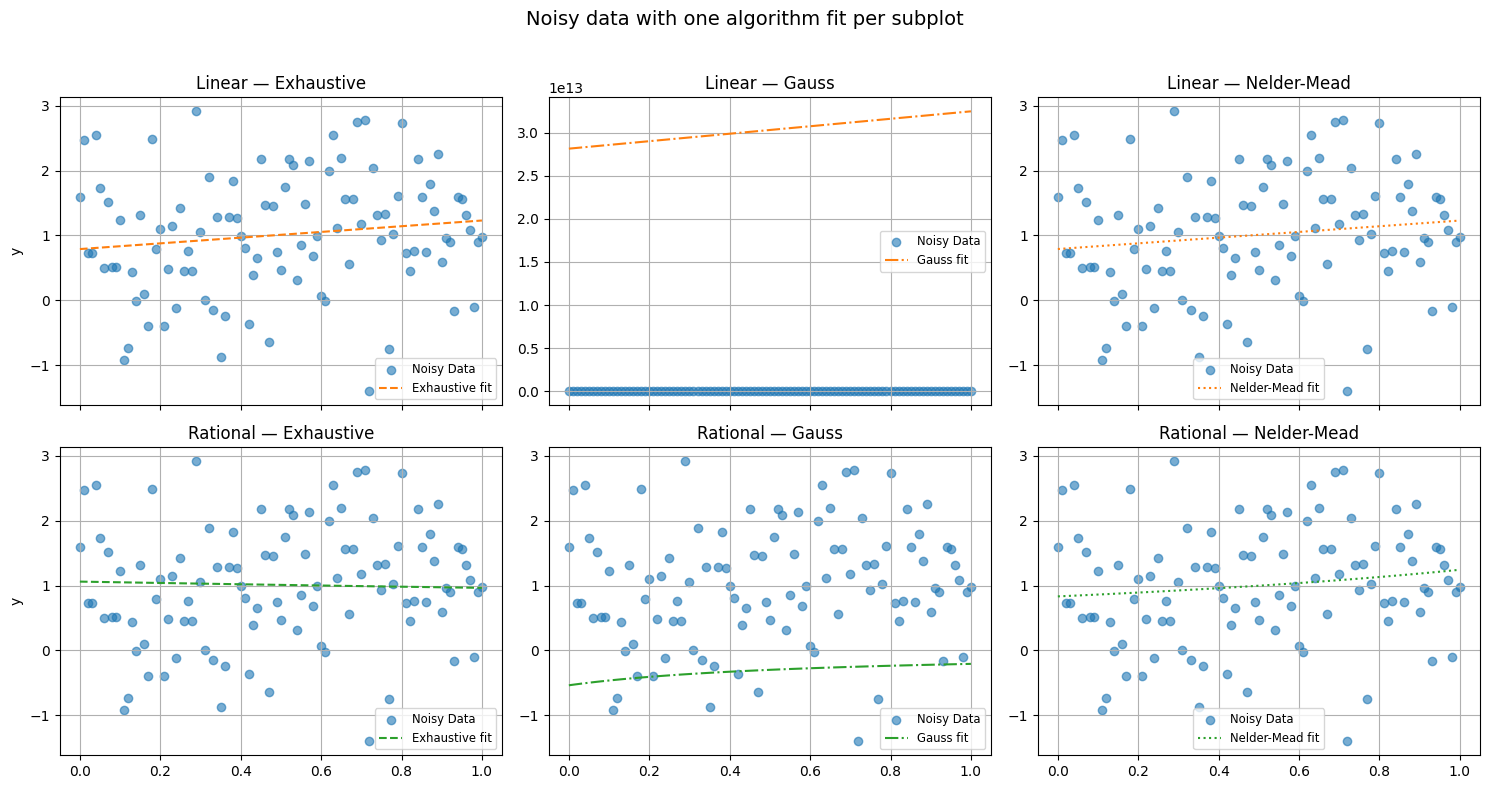

In [81]:
import matplotlib.pyplot as plt

# Prepare algorithms and their plotting styles and parameter tuples
algorithms = [
    ('Exhaustive', {'lin': (a_e, b_e), 'rat': (a_er, b_er)}, '--'),
    ('Gauss',      {'lin': (a_g, b_g), 'rat': (a_gr, b_gr)}, '-.'),
    ('Nelder-Mead',{'lin': (a_n, b_n), 'rat': (a_nr, b_nr)}, ':'),
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=False)
fig.suptitle('Noisy data with one algorithm fit per subplot', fontsize=14)

# Top row: Linear model, one column per algorithm
for col, (name, params, style) in enumerate(algorithms):
    ax = axes[0, col]
    ax.scatter(x, y, label='Noisy Data', alpha=0.6)
    a_lin, b_lin = params['lin']
    ax.plot(x, linear_model(x, a_lin, b_lin), label=f'{name} fit', linestyle=style, color='C1')
    ax.set_title(f'Linear — {name}')
    ax.grid(True)
    if col == 0:
        ax.set_ylabel('y')

# Bottom row: Rational model, one column per algorithm
for col, (name, params, style) in enumerate(algorithms):
    ax = axes[1, col]
    ax.scatter(x, y, label='Noisy Data', alpha=0.6)
    a_rat, b_rat = params['rat']
    ax.plot(x, rational_model(x, a_rat, b_rat), label=f'{name} fit', linestyle=style, color='C2')
    ax.set_title(f'Rational — {name}')
    ax.grid(True)
    if col == 0:
        ax.set_ylabel('y')

# Legends only once per column to avoid overlap
for col in range(3):
    axes[0, col].legend(loc='best', fontsize='small')
    axes[1, col].legend(loc='best', fontsize='small')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [75]:
# Add estimated parameters to the error table and include true alpha,beta
import numpy as np
import pandas as pd

# True parameters from data generation
alpha_true = alpha
beta_true = beta

rows = []

# Linear fits
for name, (a, b) in [
    ('Exhaustive', (a_e, b_e)),
    ('GradientDescent', (a_g, b_g)),
    ('Nelder-Mead', (a_n, b_n)),
]:
    err = least_squares(linear_model, x, y, a, b)
    rows.append({
        'Model': 'Linear',
        'Method': name,
        'a_est': float(a),
        'b_est': float(b),
        'LeastSquares': float(err),
        'alpha_true': float(alpha_true),
        'beta_true': float(beta_true)
    })

# Rational fits
for name, (a, b) in [
    ('Exhaustive', (a_er, b_er)),
    ('GradientDescent', (a_gr, b_gr)),
    ('Nelder-Mead', (a_nr, b_nr)),
]:
    err = least_squares(rational_model, x, y, a, b)
    rows.append({
        'Model': 'Rational',
        'Method': name,
        'a_est': float(a),
        'b_est': float(b),
        'LeastSquares': float(err),
        'alpha_true': float(alpha_true),
        'beta_true': float(beta_true)
    })

df_errors = pd.DataFrame(rows)

# Formatting: sensible column order and rounding
cols = ['Model', 'Method', 'a_est', 'b_est', 'LeastSquares', 'alpha_true', 'beta_true']
df_errors = df_errors[cols]
df_errors[['a_est','b_est','LeastSquares','alpha_true','beta_true']] = df_errors[['a_est','b_est','LeastSquares','alpha_true','beta_true']].round(6)

# Sort for readability
df_errors = df_errors.sort_values(['Model','LeastSquares']).reset_index(drop=True)

pd.options.display.float_format = '{:.6g}'.format
print(df_errors.to_string(index=False))


   Model          Method       a_est       b_est  LeastSquares  alpha_true  beta_true
  Linear     Nelder-Mead    0.438616    0.790739       83.0738     0.37454   0.950714
  Linear      Exhaustive        0.44        0.79       83.0738     0.37454   0.950714
  Linear GradientDescent 7.10219e+12 1.70707e+13   4.33841e+28     0.37454   0.950714
Rational     Nelder-Mead    0.832428   -0.330189       83.1637     0.37454   0.950714
Rational      Exhaustive        1.06         0.1       85.5314     0.37454   0.950714
Rational GradientDescent   -0.536814     1.59301       262.634     0.37454   0.950714
